In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

In [7]:
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import cv2

水増し前= 191
水増し後= 4584
Epoch 1/20
144/144 [==============================] - 11s 76ms/step - loss: 0.8290 - accuracy: 0.6069 - val_loss: 0.3713 - val_accuracy: 0.8333
Epoch 2/20
144/144 [==============================] - 12s 82ms/step - loss: 0.3948 - accuracy: 0.8521 - val_loss: 0.3578 - val_accuracy: 0.8333
Epoch 3/20
144/144 [==============================] - 12s 86ms/step - loss: 0.2521 - accuracy: 0.9112 - val_loss: 0.4892 - val_accuracy: 0.7917
Epoch 4/20
144/144 [==============================] - 13s 93ms/step - loss: 0.1729 - accuracy: 0.9435 - val_loss: 0.5131 - val_accuracy: 0.8958
Epoch 5/20
144/144 [==============================] - 14s 96ms/step - loss: 0.1069 - accuracy: 0.9610 - val_loss: 0.3526 - val_accuracy: 0.8958
Epoch 6/20
144/144 [==============================] - 14s 100ms/step - loss: 0.0824 - accuracy: 0.9775 - val_loss: 0.6011 - val_accuracy: 0.8542
Epoch 7/20
144/144 [==============================] - 16s 109ms/step - loss: 0.0648 - accuracy: 0.9825 - val_loss:

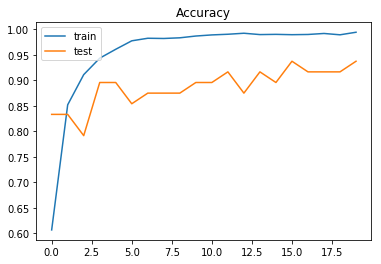

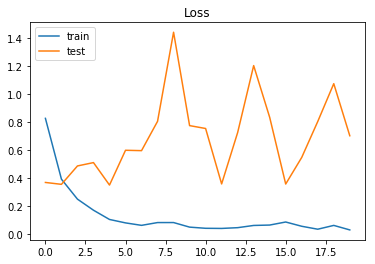

In [9]:
im_rows = 32
im_cols = 32
im_color =3
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

x_new = []
y_new = []

for i, xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30, 30, 5):
        center = (16, 16)
        mtx = cv2.getRotationMatrix2D(center, ang, 1.0)
        xi2 = cv2.warpAffine(xi, mtx, (32, 32))
        x_new.append(xi2)
        y_new.append(yi)
        xi3 = cv2.flip(xi2, 1)
        x_new.append(xi3)
        y_new.append(yi)

print('水増し前=', len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後=', len(y_train))


model = get_model(in_shape, nb_classes)

hist = model.fit(x_train, y_train,
                batch_size=32,
                epochs=20,
                verbose=1,
                validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model-light.hdf5')